<h1 align=center><font size = 5>Titanic Project Kaggle</font></h1>

# To begin 

In [682]:
#Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1086]:
#train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1087]:
train.shape

(891, 12)

In [1088]:
test.shape

(418, 11)

In [1089]:
#Train size
print("The train data size before dropping Id feature is : {} ".format(train.shape))

The train data size before dropping Id feature is : (891, 12) 


In [1090]:
y=train['Survived']

In [1091]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1092]:
data=pd.concat([train,test],ignore_index=True)

In [1093]:
data.shape

(1309, 12)

In [1094]:
# Because we don't need it in the model 
data.drop("PassengerId", axis = 1,inplace = True)

In [1095]:
# Because I think no need for the Name in the model as well
data.drop("Name", axis = 1,inplace = True)

In [1096]:
data.tail(5)

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,0,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,0,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,0,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,0,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,1,3,male,1,NaN,2668


In [1097]:
cat = len(data.select_dtypes(include=['object']).columns)
num = len(data.select_dtypes(include=['int64','float64']).columns)-1
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  4 categorical + 5 numerical = 9 features


In [1098]:
# Checking Categorical Data
data.select_dtypes(include=['object']).columns

Index(['Cabin', 'Embarked', 'Sex', 'Ticket'], dtype='object')

In [1099]:
# Checking Numerical Data
data.select_dtypes(include=['int64','float64']).columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived'], dtype='object')

In [1100]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Cabin,1014,0.774637
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000


In [1101]:
# We have a lot of missing data in the cabin feature so I guess we better drop it to make sure minimising the noise in data.
data.drop("Cabin", axis = 1,inplace = True)

In [1102]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000
SibSp,0,0.000000


In [1103]:
data["Fare"].fillna(data.Fare.mean(),inplace=True)

In [1104]:
data["Age"].fillna(data.Age.mean(),inplace=True)

In [1105]:
ticket=data['Ticket']

In [1106]:
list_Code=[]
list_Num=[]

In [1107]:
for elt in ticket : 
    el = elt.split(' ',2)
    try:
        list_Num.append(el[1])
        list_Code.append('*')
    except:
        list_Num.append(el[0])
        list_Code.append('_')

In [1108]:
ticket_Num = [('Ticket_Num', list_Num),]
ticket_Code = [('Ticket_Code', list_Code),]

In [1109]:
ticket_Num = pd.DataFrame.from_items(ticket_Num)
ticket_Code = pd.DataFrame.from_items(ticket_Code)

In [1110]:
ticket_Code.shape

(1309, 1)

In [1111]:
data = pd.concat([data, ticket_Num], axis=1)

In [1112]:
data = pd.concat([data, ticket_Code], axis=1)

In [1113]:
x=data['Ticket']
data.drop("Ticket", axis = 1,inplace = True)

In [1114]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000


In [1115]:
# As we only have to missing rows so we just gonna drop the two rows 
data = data.drop(train.loc[train['Embarked'].isnull()].index)

In [1116]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Survived,418,0.319816
Ticket_Code,0,0.000000
Ticket_Num,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000


In [1117]:
# As we deleted two rows from the train set 
train_shape=train.shape[0]-2

In [1118]:
train_shape

889

In [1119]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Survived,418,0.319816
Ticket_Code,0,0.000000
Ticket_Num,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000


In [1120]:
# Drop ticket Num
data.drop("Ticket_Num", axis = 1,inplace = True)

In [1121]:
#convert categorical variable into dummy
data = pd.get_dummies(data)

In [1122]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Survived,418,0.319816
Ticket_Code__,0,0.000000
Ticket_Code_*,0,0.000000
Sex_male,0,0.000000
Sex_female,0,0.000000
Embarked_S,0,0.000000


# Data Correlation Study

In [1123]:
train= data[:train_shape]
test= data[train_shape:]

In [1124]:
test.shape

(418, 13)

In [1125]:
test.drop("Survived", axis = 1,inplace = True)

In [1126]:
train.shape

(889, 13)

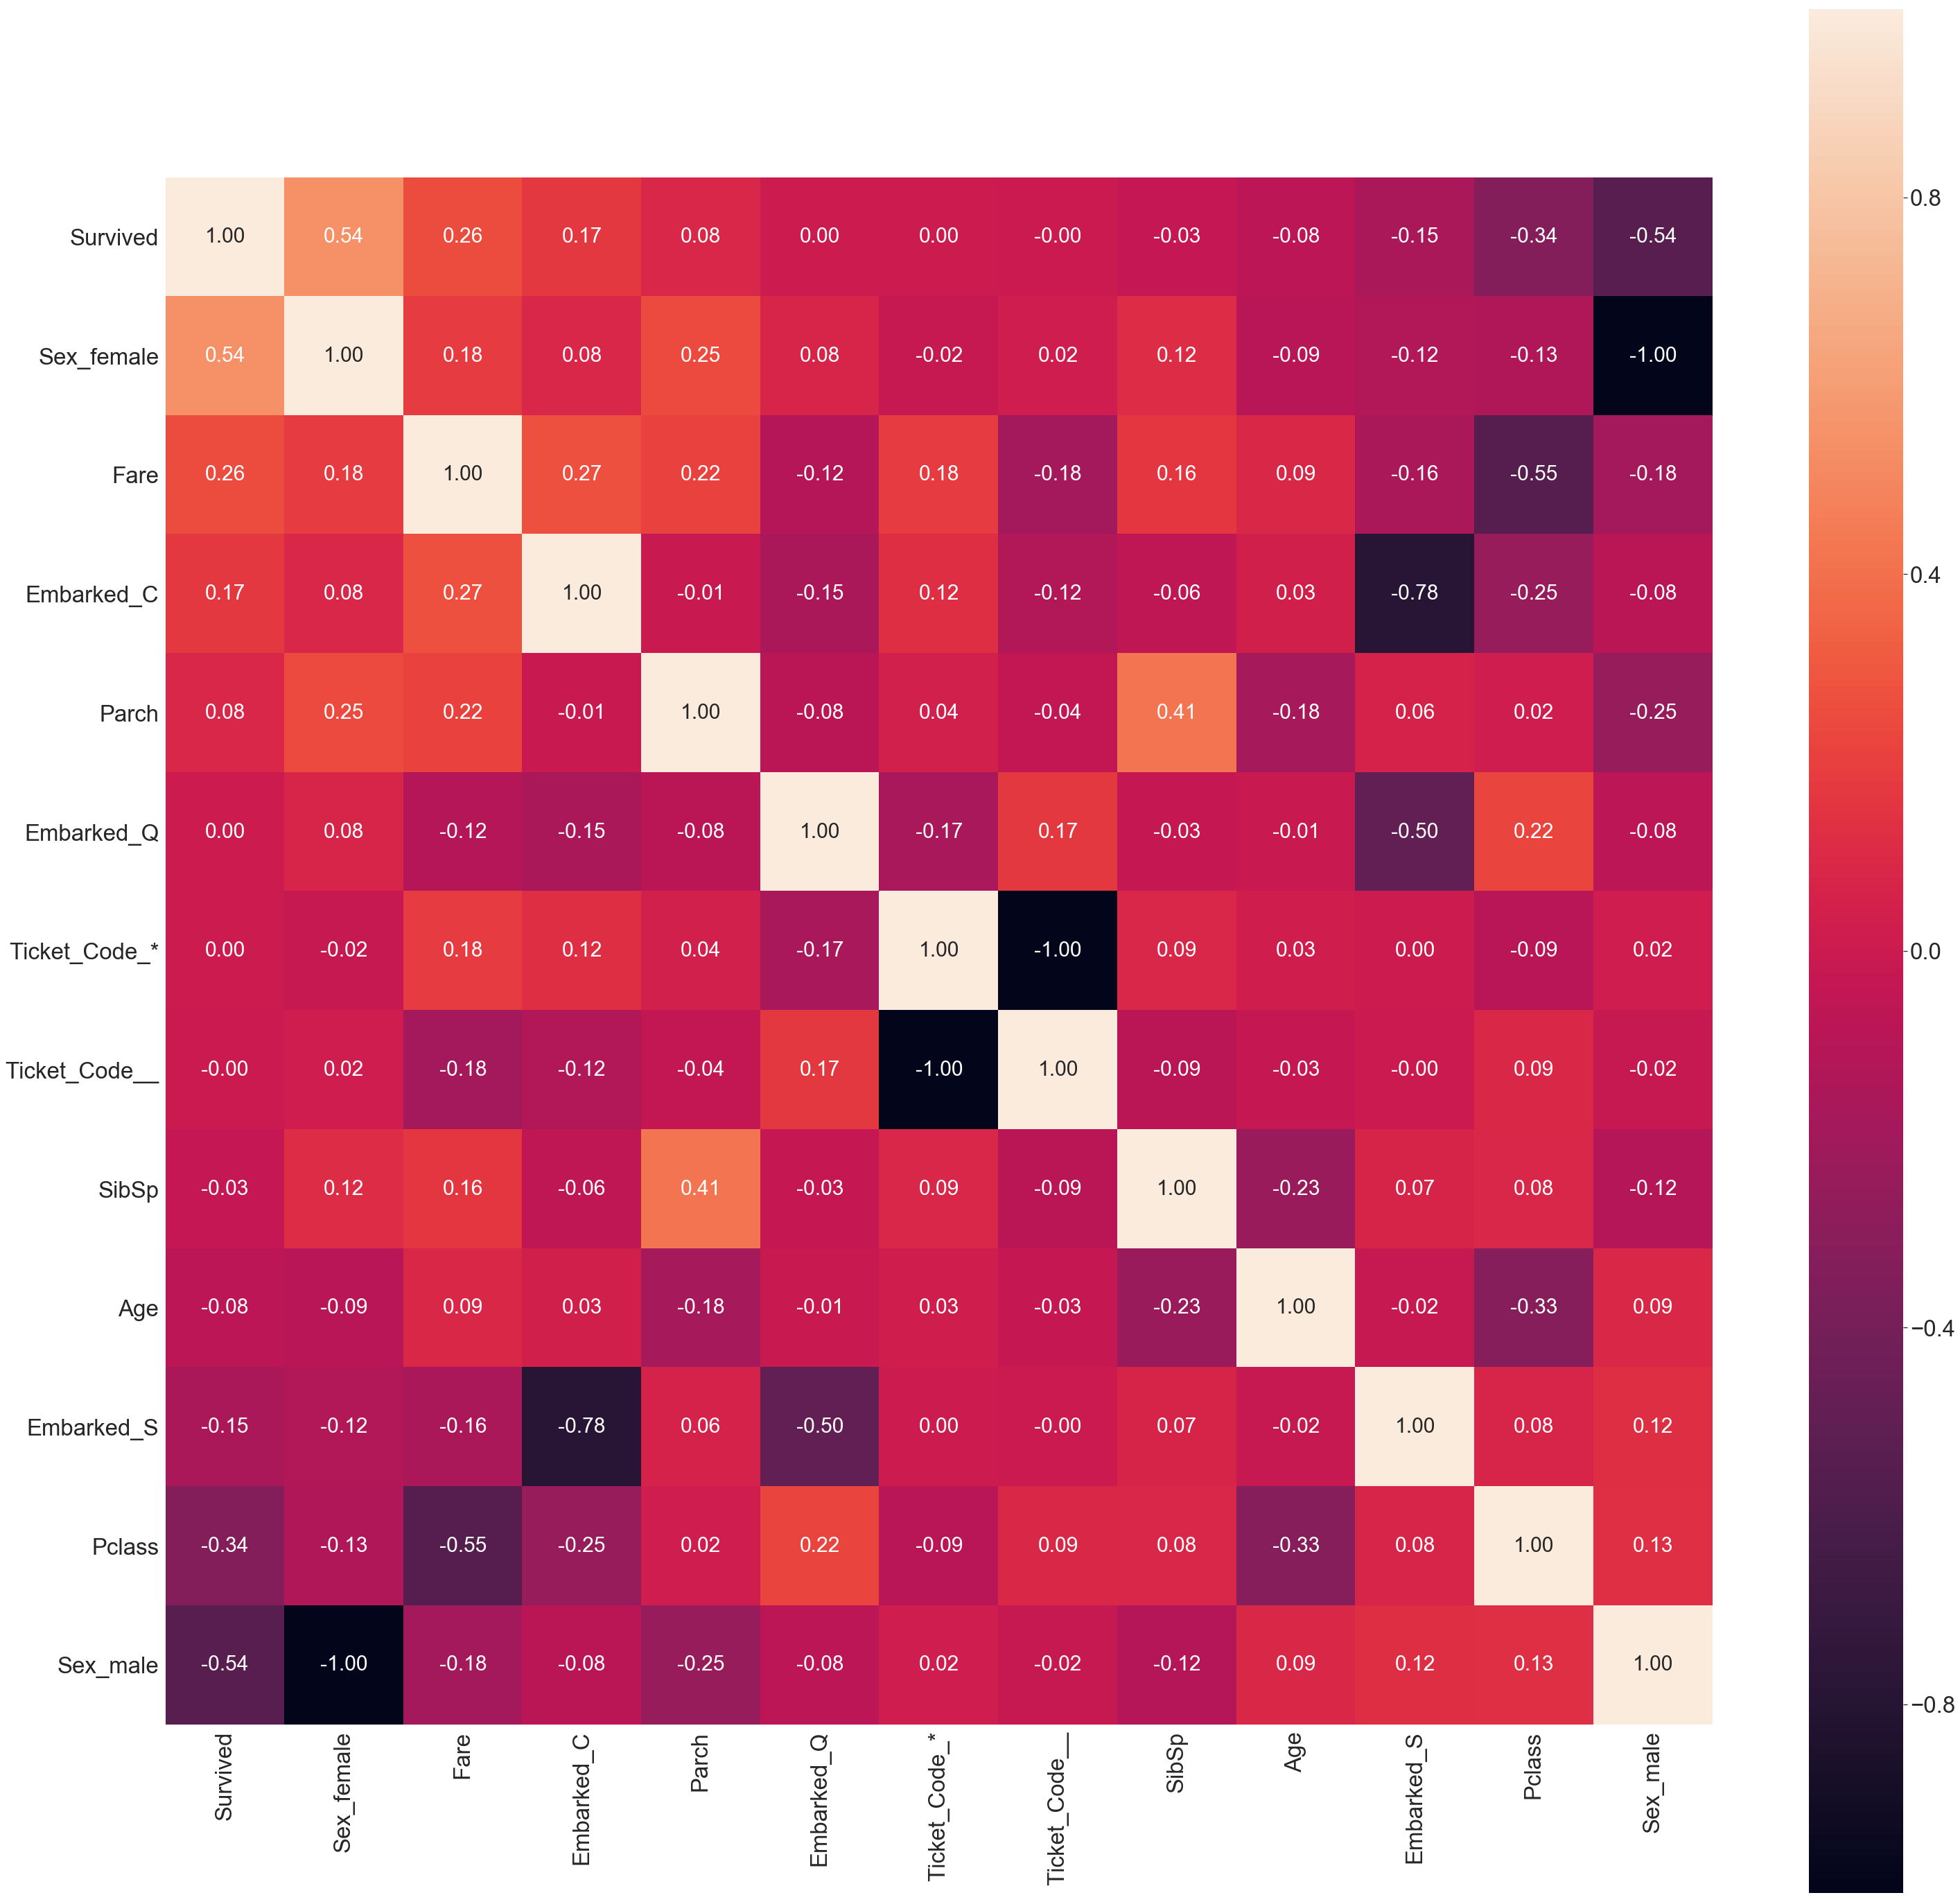

In [1127]:
#correlation matrix
corrmat = data.corr()

#saleprice correlation matrix
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
f, ax = plt.subplots(figsize=(50,50))
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=3)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 30}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1128]:
# So there is no need to keep both Sex_male and Sex_female as they refer to the same iformation 
# If i am not a woman than i am a man !! :p

In [1129]:
# I choose to let the positive correlation 
train.drop("Sex_male", axis = 1,inplace = True)
test.drop("Sex_male", axis = 1,inplace = True)
data.drop("Sex_male", axis = 1,inplace = True)

In [1130]:
train.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Ticket_Code_*',
       'Ticket_Code__'],
      dtype='object')

In [1131]:
# So we will eliminate all the features that are less correlated than 0.08 with the survived feature 
train.drop("Embarked_Q", axis = 1,inplace = True)
test.drop("Embarked_Q", axis = 1,inplace = True)
data.drop("Embarked_Q", axis = 1,inplace = True)

train.drop("Ticket_Code_*", axis = 1,inplace = True)
test.drop("Ticket_Code_*", axis = 1,inplace = True)
data.drop("Ticket_Code_*", axis = 1,inplace = True)

train.drop("Ticket_Code__", axis = 1,inplace = True)
test.drop("Ticket_Code__", axis = 1,inplace = True)
data.drop("Ticket_Code__", axis = 1,inplace = True)

train.drop("SibSp", axis = 1,inplace = True)
test.drop("SibSp", axis = 1,inplace = True)
data.drop("SibSp", axis = 1,inplace = True)

In [1132]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Survived,418,0.319816
Sex_female,0,0.000000
Embarked_S,0,0.000000
Embarked_C,0,0.000000
Pclass,0,0.000000
Parch,0,0.000000


# Standardization

In [1133]:
test.shape

(418, 7)

In [1134]:
train.shape

(889, 8)

In [1135]:
age_train=train['Age']
fare_train=train['Fare']

In [1136]:
age_test=test['Age']
fare_test=test['Fare']

In [1137]:
# Transfer age to Data Frame
age_train=pd.DataFrame(age_train,columns=['Age'])
fare_train=pd.DataFrame(fare_train,columns=['Fare'])

age_test=pd.DataFrame(age_test,columns=['Age'])
fare_test=pd.DataFrame(fare_test,columns=['Fare'])

In [1138]:
fare_test.shape

(418, 1)

In [1139]:
from sklearn.preprocessing import StandardScaler
age_scaled_train = StandardScaler().fit_transform(age_train)
fare_scaled_train = StandardScaler().fit_transform(fare_train)

age_scaled_test = StandardScaler().fit_transform(age_test)
fare_scaled_test = StandardScaler().fit_transform(fare_test)

In [1140]:
age_scaled_train =pd.DataFrame(age_scaled_train,columns=['Age'])
age_scaled_test =pd.DataFrame(age_scaled_test,columns=['Age'])

fare_scaled_train =pd.DataFrame(fare_scaled_train,columns=['Fare'])
fare_scaled_test =pd.DataFrame(fare_scaled_test,columns=['Fare'])

In [1141]:
fare_scaled_test.columns

Index(['Fare'], dtype='object')

In [1142]:
fare_scaled_test.shape

(418, 1)

In [1143]:
train.drop("Age", axis = 1,inplace = True)
test.drop("Age", axis = 1,inplace = True)

In [1144]:
train.shape

(889, 7)

In [1145]:
test.shape

(418, 6)

In [1146]:
train.drop("Fare", axis = 1,inplace = True)
test.drop("Fare", axis = 1,inplace = True)

In [1147]:
train.shape

(889, 6)

In [1148]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [1149]:
age_scaled_train.reset_index(drop=True, inplace=True)
age_scaled_test.reset_index(drop=True, inplace=True)

fare_scaled_train.reset_index(drop=True, inplace=True)
fare_scaled_test.reset_index(drop=True, inplace=True)

In [1150]:
train['Age'] = age_scaled_train
test['Age'] = age_scaled_test

In [1151]:
train['Fare'] = fare_scaled_train
test['Fare'] = fare_scaled_test

In [1152]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Fare,0,0.0
Age,0,0.0
Sex_female,0,0.0
Embarked_S,0,0.0
Embarked_C,0,0.0
Survived,0,0.0
Pclass,0,0.0
Parch,0,0.0


In [1153]:
#missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Fare,0,0.0
Age,0,0.0
Sex_female,0,0.0
Embarked_S,0,0.0
Embarked_C,0,0.0
Pclass,0,0.0
Parch,0,0.0


# Prepare data for the Model

In [1154]:
y=train['Survived']

In [1155]:
train.drop("Survived", axis = 1,inplace = True)

In [1156]:
train.columns

Index(['Parch', 'Pclass', 'Embarked_C', 'Embarked_S', 'Sex_female', 'Age',
       'Fare'],
      dtype='object')

In [1157]:
test.columns 

Index(['Parch', 'Pclass', 'Embarked_C', 'Embarked_S', 'Sex_female', 'Age',
       'Fare'],
      dtype='object')

In [1158]:
test.shape

(418, 7)

In [1159]:
y.isnull().sum()

0

In [1160]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Fare,0,0.0
Age,0,0.0
Sex_female,0,0.0
Embarked_S,0,0.0
Embarked_C,0,0.0
Pclass,0,0.0


In [1161]:
#missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Fare,0,0.0
Age,0,0.0
Sex_female,0,0.0
Embarked_S,0,0.0
Embarked_C,0,0.0
Pclass,0,0.0


In [1183]:
train.head()

,Parch,Pclass,Embarked_C,Embarked_S,Sex_female,Age,Fare
0,0,3,0,1,0,-0.593276,-0.500240
1,0,1,1,0,1,0.641159,0.788947
2,0,3,0,1,1,-0.284667,-0.486650
3,0,1,0,1,1,0.409702,0.422861
4,0,3,0,1,0,0.409702,-0.484133


In [1184]:
test.head()

,Parch,Pclass,Embarked_C,Embarked_S,Sex_female,Age,Fare
0,0,3,0,0,0,0.341348,-0.498306
1,0,3,0,1,1,1.331807,-0.513173
2,0,2,0,0,0,2.520359,-0.464987
3,0,3,0,1,0,-0.252928,-0.483365
4,1,3,0,1,1,-0.649112,-0.418371


# Model 

In [1163]:
from sklearn.model_selection import train_test_split

In [1164]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

## Random Forest Regressor

## Logistic Regression

In [1171]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [1172]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[87, 22],
       [14, 55]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

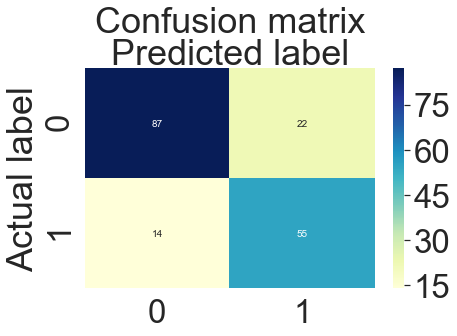

In [1173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1174]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.797752808988764
Precision: 0.7142857142857143
Recall: 0.7971014492753623


In [1175]:
logreg.fit(train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1176]:
y_pred=logreg.predict(test)

In [1177]:
y_pred=y_pred.astype(int)

## Submit

In [1178]:
test2 = pd.read_csv('test.csv')

In [1179]:
results =  {'PassengerId':test2.PassengerId,'Survived':y_pred}
results = pd.DataFrame(results,columns=['PassengerId','Survived'])

In [1180]:
results.to_csv('sf.csv',index=False)